In [1]:
import matplotlib.pyplot as plt
import numpy as np

# NOTHING ON THIS MODULE IS WORKING IN ANY WAY YET
# Adapt this for the columns in de remodnav output?

In [2]:
# This function should be in an other module

def saccades_dir(saccades):
    
    """
    Function not ready AT ALL.

    Decide if it returns 2 pd.Series with direction and degrees or if it concats those series into de dataframe.

    """
    # Saccades degree
    x_dif = saccades['xEnd'] - saccades['xStart']
    y_dif = saccades['yEnd'] - saccades['yStart']
    z = complex(x_dif, y_dif)
    deg = np.angle(z, deg=True)

    if -15 < deg < 15:
        dir = 'r'
    elif 75 < deg < 105:
        dir = 'd'
    elif 165 < deg or deg < -165:
        dir = 'l'
    elif -75 > deg > -105:
        dir = 'u'
    else:
        dir = 'none'

    saccades['deg'] = deg
    saccades['dir'] = dir

    return saccades

In [16]:

def fixation_duration(fixations, ax=None):

    print('Plotting fixation duration histogram')

    # Use provided axes (or not)
    if ax is None:
        fig, ax = plt.subplots()

    ax.hist(fixations['duration'], bins=100, edgecolor='black', linewidth=1.2, density=True, stacked=True)
    ax.set_title('Fixation duration')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Density')



def saccades_amplitude(saccades, ax=None):

    print('Plotting saccades amplitude histogram')

    # Use provided axes (or not)
    if ax is None:
        fig, ax = plt.subplots()

    saccades_amp = saccades['ampDeg']

    ax.hist(saccades_amp, bins=100, range=(0, 20), edgecolor='black', linewidth=1.2, density=True, stacked=True)
    ax.set_title('Saccades amplitude')
    ax.set_xlabel('Amplitude (deg)')
    ax.set_ylabel('Density')



def saccades_dir_hist(saccades, fig=None, ax=None):

    print('Plotting saccades direction histogram')

    # Use provided axes (or not)
    if ax is None:
        fig = plt.figure()
        ax = plt.subplot(polar=True)
    else:
        ax.set_axis_off()
        ax = fig.add_subplot(2, 2, 3, projection='polar')



    # CHECK THIS PART AFTER DECIDING WHAT DE SACCADES_DIR FUNCTION DOES
    saccades = saccades_dir(saccades=saccades)
    saccades_deg, saccades_dir = saccades_dir(saccades=saccades)
    
    saccades_rad = saccades_deg * np.pi / 180 

    n_bins = 24
    ang_hist, bin_edges = np.histogram(saccades_rad, bins=24, density=True)
    bin_centers = [np.mean((bin_edges[i], bin_edges[i+1])) for i in range(len(bin_edges) - 1)]

    bars = ax.bar(bin_centers, ang_hist, width=2*np.pi/n_bins, bottom=0.0, alpha=0.4, edgecolor='black')
    ax.set_xlabel('Saccades direction')
    ax.set_yticklabels([])

    for r, bar in zip(ang_hist, bars):
        bar.set_facecolor(plt.cm.Blues(r / np.max(ang_hist)))



def sac_main_seq(saccades, hline=None, ax=None):

    print('Plotting main sequence')

    # Use provided axes (or not)
    if ax is None:
        fig, ax = plt.subplots()

    saccades_peack_vel = saccades['vPeak']
    saccades_amp = saccades['ampDeg']

    ax.plot(saccades_amp, saccades_peack_vel, '.', alpha=0.1, markersize=2)
    ax.set_xlim(0.01)
    if hline:
        ax.hlines(y=hline, xmin=plt.gca().get_xlim()[0], xmax=plt.gca().get_xlim()[1], colors='grey', linestyles='--', label=hline)
        ax.legend()
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title('Main sequence')
    ax.set_xlabel('Amplitude (deg)')
    ax.set_ylabel('Peak velocity (deg)')
    ax.grid()


In [17]:
# ----- Example -----#

import os
import pandas as pd

# Get path to samples from parsed edf
cwd = os.getcwd()
parent_directory = os.path.abspath(os.path.join(cwd, os.pardir))
path_to_saccades = parent_directory + '/example_dataset_derivatives/sub-ab01/ses-second/sacc.hdf5'
path_to_fixations = parent_directory + '/example_dataset_derivatives/sub-ab01/ses-second/fix.hdf5'

# Load samples.hdf5 file
saccades = pd.read_hdf(path_or_buf=path_to_saccades)
fixations = pd.read_hdf(path_or_buf=path_to_fixations)

In [18]:
saccades

,eye,tStart,tEnd,duration,xStart,yStart,xEnd,yEnd,ampDeg,vPeak
0,L,2356961,2357073,113,869.2,438.1,882.0,340.3,1.55,472
1,R,2356956,2357090,135,844.9,432.0,860.7,369.8,1.01,501
2,L,2357348,2357514,167,884.4,401.2,864.2,320.0,1.31,357
3,R,2357343,2357530,188,850.4,413.6,851.2,348.2,1.03,480
4,R,2357696,2357719,24,844.4,435.3,925.2,498.5,1.61,148
...,...,...,...,...,...,...,...,...,...,...
4176,R,3826651,3826672,22,516.2,898.8,472.0,922.8,0.77,80
4177,L,3827120,3827135,16,459.7,865.8,513.1,871.6,0.83,67
4178,R,3827120,3827140,21,495.8,889.0,541.6,897.1,0.72,77
4179,R,3827718,3827738,21,540.7,881.0,493.9,854.4,0.83,86


In [19]:
fixations

,eye,tStart,tEnd,duration,xAvg,yAvg,pupilAvg
0,R,2356874,2356955,82,851.1,421.8,544
1,L,2356874,2356960,87,869.6,428.5,579
2,R,2357091,2357342,252,857.3,414.8,577
3,L,2357074,2357347,274,880.5,392.2,609
4,L,2357515,2357695,181,860.7,396.0,640
...,...,...,...,...,...,...,...
4312,R,3826673,3827119,447,487.4,887.2,509
4313,L,3827136,3827716,581,490.4,854.7,596
4314,R,3827141,3827717,577,536.4,899.1,510
4315,L,3827739,3828192,454,455.1,837.8,610


Plotting fixation duration histogram
Plotting saccades amplitude histogram
Plotting main sequence


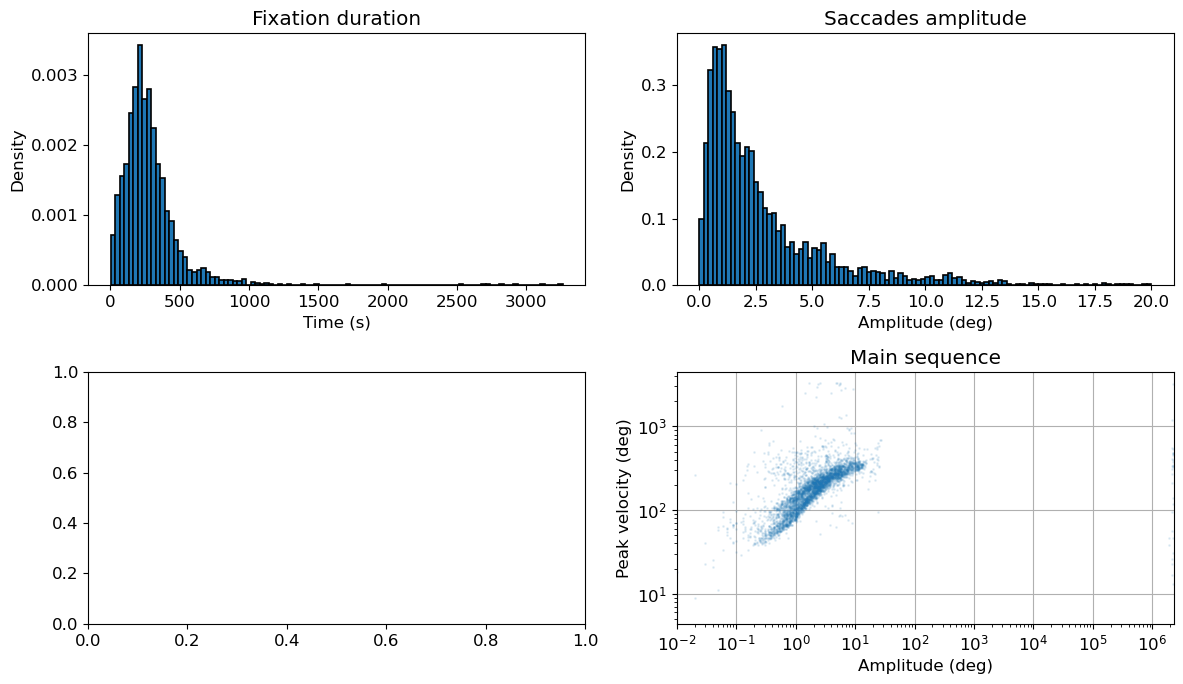

In [20]:
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

fixation_duration(fixations=fixations, ax=axs[0, 0])
saccades_amplitude(saccades=saccades, ax=axs[0, 1])
# saccades_dir_hist(saccades=saccades, fig=fig, ax=axs[1, 0])
sac_main_seq(saccades=saccades, ax=axs[1, 1])

fig.tight_layout()